In [8]:
%matplotlib inline

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

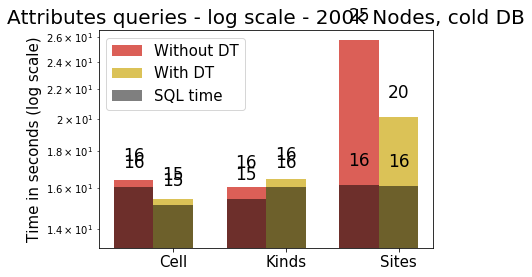

In [10]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# We compare the execution time in DJango JSONB using attributes queries.
# In these graphs we compare the time needed with and without datetime conversion

# 200k nodes - part of group 20160222-225236 - Cold DB

# Data come from the following files:
# speed_tests_aiida_jsonb_small.txt (JSONB - with datetime conversion)
# speed_tests_aiida_jsonb_small_no_datetime.txt (JSONB - without datetime conversion)

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

new_schema_with_dt = [16.3869299889, 16.0539438725, 25.7297959328]
new_schema_sql_with_dt = [16.025652, 15.416674, 16.170481]
new_schema_without_dt = [15.4248139858, 16.4456310272, 20.1244819164]
new_schema_sql_without_dt = [15.134946, 16.040837, 16.097701]
indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, new_schema_with_dt, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema_without_dt, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind, new_schema_sql_with_dt, width, log=True, color='black', alpha=0.5)

rects2_sql = ax.bar(ind + width, new_schema_sql_without_dt, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 200k Nodes, cold DB', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects1_sql[0]), ('With DT', 'Without DT', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_200_cold_with_attr_jsonb_datetime.svg")

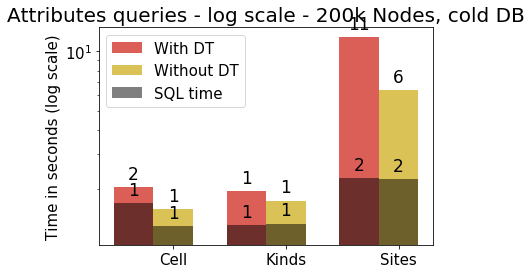

In [13]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# We compare the execution time in DJango JSONB using attributes queries.
# In these graphs we compare the time needed with and without datetime conversion

# 200k nodes - part of group 20160222-225236 - Warm DB

# Data come from the following files:
# speed_tests_aiida_jsonb_small.txt (JSONB - with datetime conversion)
# speed_tests_aiida_jsonb_small_no_datetime.txt (JSONB - without datetime conversion)

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

new_schema_with_dt = [2.04142618179, 1.95860099792, 11.8104319572]
new_schema_sql_with_dt = [1.694349, 1.311131, 2.269098]
new_schema_without_dt = [1.5865778923, 1.74661397934, 6.34319591522]
new_schema_sql_without_dt = [1.301824, 1.336381, 2.244781]

indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, new_schema_with_dt, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema_without_dt, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind, new_schema_sql_with_dt, width, log=True, color='black', alpha=0.5)

rects2_sql = ax.bar(ind + width, new_schema_sql_without_dt, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 200k Nodes, warm DB', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects1_sql[0]), ('With DT', 'Without DT', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_200_warm_with_attr_jsonb_datetime.svg")

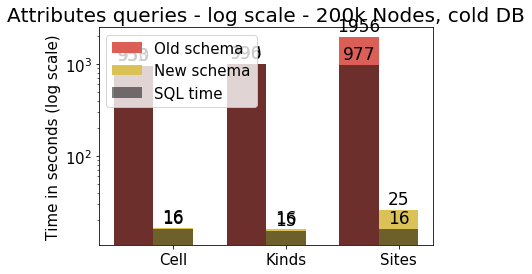

In [11]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# In this comparison the time of the re-construction (de-serialization) of the attributes is
# calculated (Django EAV).
# In the EAV case, we issue one SQL query (and not an attribute query per node) and we 
# manipulate the reply at the Python level where reconstruct the attributes

# 200k nodes - part of group 20160222-225236 - Cold DB

# Data come from the following files:
# speed_tests_aiida_eav_small_ser_v3.txt (EAV)
# speed_tests_aiida_jsonb_small.txt (JSONB)

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

old_schema = [953.05822396287, 996.03412985778, 1956.507531879]
old_schema_sql = [950.409274, 990.416956, 977.463062]
new_schema = [16.3869299889, 16.0539438725, 25.7297959328]
new_schema_sql = [16.025652, 15.416674, 16.170481]
indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, old_schema, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind, old_schema_sql, width, log=True, color='black', alpha=0.5)

rects2_sql = ax.bar(ind + width, new_schema_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 200k Nodes, cold DB', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects1_sql[0]), ('Old schema', 'New schema', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_200_cold_with_attr_jsonb_datetime.svg")

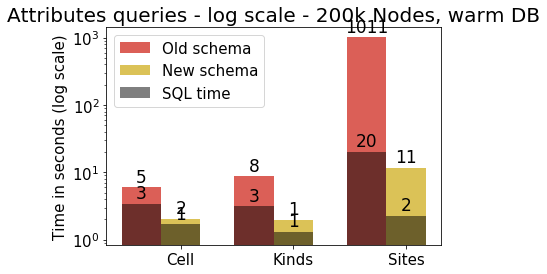

In [12]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# In this comparison the time of the re-construction (de-serialization) of the attributes is
# calculated (Django EAV).
# In the EAV case, we issue one SQL query (and not an attribute query per node) and we 
# manipulate the reply at the Python level where reconstruct the attributes

# 200k nodes - part of group 20160222-225236 - Warm DB

# Data come from the following files:
# speed_tests_aiida_eav_small_ser_v3.txt (EAV)
# speed_tests_aiida_jsonb_small.txt (JSONB)

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

old_schema = [5.99900102615, 8.78895902634, 1011.8745222088]
old_schema_sql = [3.383515, 3.126176, 20.306761]
new_schema = [2.04142618179, 1.95860099792, 11.8104319572]
new_schema_sql = [1.694349, 1.311131, 2.269098]
indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, old_schema, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind, old_schema_sql, width, log=True, color='black', alpha=0.5)

rects2_sql = ax.bar(ind + width, new_schema_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 200k Nodes, warm DB', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects1_sql[0]), ('Old schema', 'New schema', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_200_warm_with_attr_ser_one_eav_query.svg")

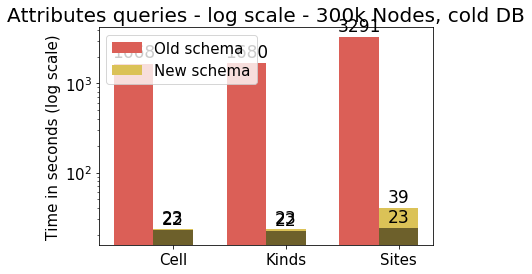

In [5]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# In this comparison the time of the re-construction (de-serialization) of the attributes is
# calculated (Django EAV).
# On the other hand since there are many SQL queries (one per node to get the corresponding
# attributes of that node), the SQL time for the Django EAV case can not be estimated.

# 300k nodes - part of group 20160222-225236 - Cold DB

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

old_schema = [1668.982449535, 1680.56568567, 3291.3400147]
new_schema = [23.0278289318, 23.1643459797, 39.7718458176]
new_schema_sql = [22.482981, 22.202875, 23.652955]
indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, old_schema, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema, width, log=True, color=cols[1])
rects2_sql = ax.bar(ind + width, new_schema_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 300k Nodes, cold DB', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0]), ('Old schema', 'New schema', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_300_cold_with_attr_ser.svg")

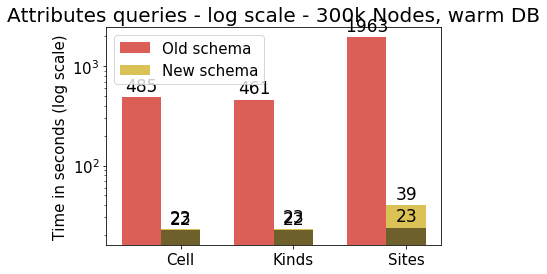

In [6]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1

# In this comparison the time of the re-construction (de-serialization) of the attributes is
# calculated (Django EAV).
# On the other hand since there are many SQL queries (one per node to get the corresponding
# attributes of that node), the SQL time for the Django EAV case can not be estimated.

# 300k nodes - part of group 20160222-225236 - Warm DB

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

old_schema = [485.942664862, 461.350110531, 1963.752602102]
new_schema = [23.0278289318, 23.1643459797, 39.7718458176]
new_schema_sql = [22.482981, 22.202875, 23.652955]
indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, old_schema, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema, width, log=True, color=cols[1])
rects2_sql = ax.bar(ind + width, new_schema_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 300k Nodes, warm DB', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0]), ('Old schema', 'New schema', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_300_warm_with_attr_ser.svg")

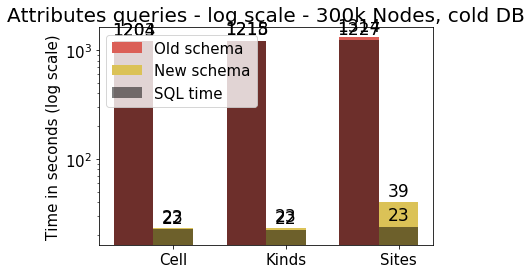

In [31]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1
# 300k nodes - part of group 20160222-225236 - Cold DB

# This doesn't contain the de-serialization of the nodes at the Python level (From EAV 
# model to dictionaries)

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

old_schema = [1204.76407504, 1218.32961702, 1314.24235487]
old_schema_sql = [1203.164919, 1215.007219, 1227.021945]
new_schema = [23.0278289318, 23.1643459797, 39.7718458176]
new_schema_sql = [22.482981, 22.202875, 23.652955]
indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, old_schema, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind, old_schema_sql, width, log=True, color='black', alpha=0.5)

rects2_sql = ax.bar(ind + width, new_schema_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 300k Nodes, cold DB', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects1_sql[0]), ('Old schema', 'New schema', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_300_cold.svg")

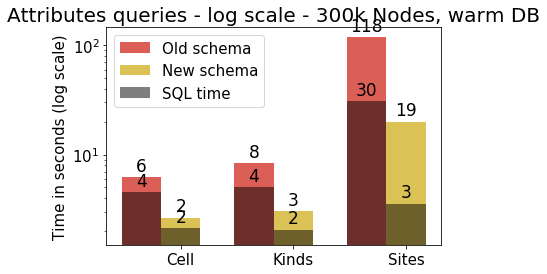

In [32]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1
# 300k nodes - part of group 20160222-225236 - Warm DB

# This doesn't contain the de-serialization of the nodes at the Python level (Form EAV 
# model to dictionaries)

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

old_schema = [6.17456388474, 8.36090302467, 118.483629942]
old_schema_sql = [4.534682, 4.997428, 30.796353]
new_schema = [2.65073394775, 3.01792001724, 19.8850951195]
new_schema_sql = [2.112355, 2.044650, 3.539986]
indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, old_schema, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind, old_schema_sql, width, log=True, color='black', alpha=0.5)

rects2_sql = ax.bar(ind + width, new_schema_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale - 300k Nodes, warm DB', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects1_sql[0]), ('Old schema', 'New schema', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_300_warm.svg")

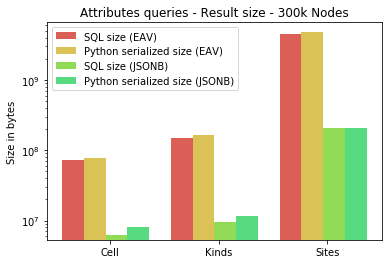

In [8]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Davide. It's the continuation of Mounet's database.
# For AiiDA v1
# 300k nodes - part of group 20160222-225236

sql_eav = [72611157, 150982730, 4559616198]
p_eav = [76677702, 163171421, 4779329463]
sql_jsonb = [6151867, 9523353, 208930947]
p_jsonb = [8164031, 11535478, 210500720]

w = 0.20

fig, ax = plt.subplots()
rect1 = ax.bar(ind, sql_eav, w, log=True, color=cols[0])

rect2 = ax.bar(ind + w, p_eav, w, log=True, color=cols[1])

rect3 = ax.bar(ind + w*2, sql_jsonb, w, log=True, color=cols[2])

rect4 = ax.bar(ind + w*3, p_jsonb, w, log=True, color=cols[3])

# add some text for labels, title and axes ticks
ax.set_ylabel('Size in bytes')
ax.set_title('Attributes queries - Result size - 300k Nodes')
ax.set_xticks(ind + w*1.7)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'))

#ax.legend((rect1[0], rect2[0]), ('SQL result size', 'Python serialized result size'), loc=2)
ax.legend((rect1[0], rect2[0], rect3[0], rect4[0]), ('SQL size (EAV)', 'Python serialized size (EAV)', 'SQL size (JSONB)', 'Python serialized size (JSONB)'), loc=2)
plt.savefig("attr_queries_300_size.svg")

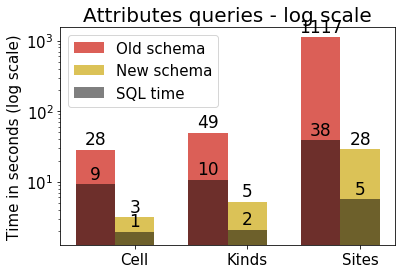

In [9]:
# JSON speed-up experiments performed by Jocelyn

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

old_schema = [28.13, 49.22, 1117.03]
old_schema_sql = [9.18, 10.6, 38.73]
new_schema = [3.13, 5.19, 28.82]
new_schema_sql = [1.96, 2.08, 5.64]
indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, old_schema, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind, old_schema_sql, width, log=True, color='black', alpha=0.5)

rects2_sql = ax.bar(ind + width, new_schema_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects1_sql[0]), ('Old schema', 'New schema', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_joc.svg")

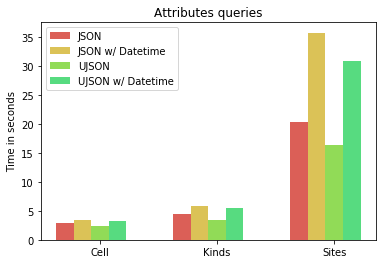

In [10]:
json = [2.90, 4.44, 20.29]
json_dt = [3.36, 5.83, 35.7]
ujson = [2.36, 3.41, 16.40]
ujson_dt = [3.17, 5.40, 30.88]

w = 0.15

fig, ax = plt.subplots()
rect1 = ax.bar(ind, json, w, color=cols[0])

rect2 = ax.bar(ind + w, json_dt, w, color=cols[1])

rect3 = ax.bar(ind + w*2, ujson, w, color=cols[2])

rect4 = ax.bar(ind + w*3, ujson_dt, w, color=cols[3])

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds')
ax.set_title('Attributes queries')
ax.set_xticks(ind + w*2)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'))

ax.legend((rect1[0], rect2[0], rect3[0], rect4[0]), ('JSON', 'JSON w/ Datetime', 'UJSON', 'UJSON w/ Datetime'), loc=2)

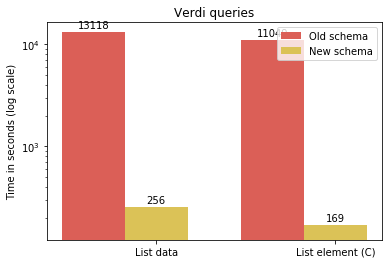

In [11]:
fig, ax = plt.subplots()
ind = np.arange(2)
django = [13118, 11049]
sqla = [256, 169]
width = 0.35
rects1 = ax.bar(ind, django, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, sqla, width, log=True, color=cols[1])

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)')
ax.set_title('Verdi queries')
ax.set_xticks(ind + width)
ax.set_xticklabels(('List data', 'List element (C)'))

ax.legend((rects1[0], rects2[0]), ('Old schema', 'New schema'))

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

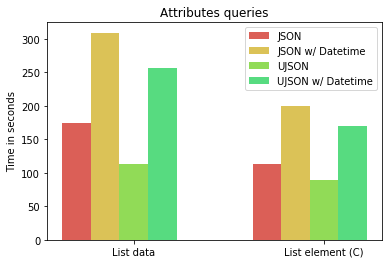

In [12]:
json = [173.92, 113.46]
json_dt = [308.92, 199.46]
ujson = [113.20, 88.81]
ujson_dt = [256.80, 169.79]

w = 0.15

fig, ax = plt.subplots()
rect1 = ax.bar(ind, json, w, color=cols[0])

rect2 = ax.bar(ind + w, json_dt, w, color=cols[1])

rect3 = ax.bar(ind + w*2, ujson, w, color=cols[2])

rect4 = ax.bar(ind + w*3, ujson_dt, w, color=cols[3])

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds')
ax.set_title('Attributes queries')
ax.set_xticks(ind + w*2)
ax.set_xticklabels(('List data', 'List element (C)'))

ax.legend((rect1[0], rect2[0], rect3[0], rect4[0]), ('JSON', 'JSON w/ Datetime', 'UJSON', 'UJSON w/ Datetime'))